In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'M1_data.csv')
df.head()

,trust_apple,interest_computers,age_computer,user_pcmac,appleproducts_count,familiarity_m1,f_batterylife,f_price,f_size,f_multitasking,...,f_neural,f_synergy,f_performanceloss,m1_consideration,m1_purchase,gender,age_group,income_group,status,domain
0,No,4,8,PC,0,No,5,4,3,4,...,2,1,1,1,Yes,Male,2,2,Student,Science
1,Yes,2,4,PC,1,No,5,5,5,3,...,2,2,4,2,No,Male,2,3,Employed,Finance
2,Yes,5,6,PC,0,No,3,4,2,4,...,2,2,2,4,Yes,Male,2,2,Student,IT & Technology
3,Yes,2,6,Apple,4,No,4,3,3,4,...,4,4,3,2,No,Female,2,2,Student,Arts & Culture
4,Yes,4,4,Apple,7,Yes,5,3,3,4,...,3,4,4,4,Yes,Male,5,7,Employed,Hospitality


In [3]:
df.isnull().sum()

trust_apple            0
interest_computers     0
age_computer           0
user_pcmac             0
appleproducts_count    0
familiarity_m1         0
f_batterylife          0
f_price                0
f_size                 0
f_multitasking         0
f_noise                0
f_performance          0
f_neural               0
f_synergy              0
f_performanceloss      0
m1_consideration       0
m1_purchase            0
gender                 0
age_group              0
income_group           0
status                 0
domain                 0
dtype: int64

In [4]:
#mannual label encoding
df['trust_apple'] = df['trust_apple'].replace(['Yes','No'],['1','0'])
df['user_pcmac'] = df['user_pcmac'].replace(['PC','Apple','Hp','Other'],['1','0','2','2'])
df['familiarity_m1'] = df['familiarity_m1'].replace(['Yes','No'],['1','0'])
df['m1_purchase'] = df['m1_purchase'].replace(['Yes','No'],['1','0'])
df['gender'] = df['gender'].replace(['Male','Female'],['1','0'])
df['status'] = df['status'].replace(['Male','Female'],['1','0'])
df['gender'] = df['gender'].replace(['Male','Female'],['1','0'])
df['status'] = df['status'].replace(['Student','Employed','Retired','Student ant employed','Unemployed','Self-Employed'],['0','1','2','1','3','4'])
df['domain'] = df['domain'].replace(['Science','Finance','IT & Technology',
                                                 'Arts & Culture','Hospitality','Politics','Social Sciences','Administration & Public Services','Education',
                                                 'Engineering','Marketing','Healthcare','Business','Retired','Economics','Law','Agriculture','Communication ',
                                                 'Realestate','Logistics','Consulting ','Retail'],
                                                  ['0','1','2','3','4','5','6','7','8','9','10','11','12','21','13','14','15','16','17','18','29','20'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   trust_apple          133 non-null    object
 1   interest_computers   133 non-null    int64 
 2   age_computer         133 non-null    int64 
 3   user_pcmac           133 non-null    object
 4   appleproducts_count  133 non-null    int64 
 5   familiarity_m1       133 non-null    object
 6   f_batterylife        133 non-null    int64 
 7   f_price              133 non-null    int64 
 8   f_size               133 non-null    int64 
 9   f_multitasking       133 non-null    int64 
 10  f_noise              133 non-null    int64 
 11  f_performance        133 non-null    int64 
 12  f_neural             133 non-null    int64 
 13  f_synergy            133 non-null    int64 
 14  f_performanceloss    133 non-null    int64 
 15  m1_consideration     133 non-null    int64 
 16  m1_purch

In [6]:
# COVERING DTYPES

df['trust_apple'] = pd.to_numeric(df['trust_apple'])
df['user_pcmac'] = pd.to_numeric(df['user_pcmac'])
df['familiarity_m1'] = pd.to_numeric(df['familiarity_m1'])
df['m1_purchase'] = pd.to_numeric(df['m1_purchase'])
df['gender'] = pd.to_numeric(df['gender'])
df['status'] = pd.to_numeric(df['status'])
df['domain'] = pd.to_numeric(df['domain'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   trust_apple          133 non-null    int64
 1   interest_computers   133 non-null    int64
 2   age_computer         133 non-null    int64
 3   user_pcmac           133 non-null    int64
 4   appleproducts_count  133 non-null    int64
 5   familiarity_m1       133 non-null    int64
 6   f_batterylife        133 non-null    int64
 7   f_price              133 non-null    int64
 8   f_size               133 non-null    int64
 9   f_multitasking       133 non-null    int64
 10  f_noise              133 non-null    int64
 11  f_performance        133 non-null    int64
 12  f_neural             133 non-null    int64
 13  f_synergy            133 non-null    int64
 14  f_performanceloss    133 non-null    int64
 15  m1_consideration     133 non-null    int64
 16  m1_purchase          133 n

In [8]:
df.shape

(133, 22)

In [9]:
df.describe()

,trust_apple,interest_computers,age_computer,user_pcmac,appleproducts_count,familiarity_m1,f_batterylife,f_price,f_size,f_multitasking,...,f_neural,f_synergy,f_performanceloss,m1_consideration,m1_purchase,gender,age_group,income_group,status,domain
count,133.000000,133.00000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,0.857143,3.81203,2.827068,0.368421,2.609023,0.436090,4.526316,3.872180,3.157895,4.120301,...,3.165414,3.466165,3.375940,3.609023,0.661654,0.541353,2.969925,2.969925,0.503759,6.684211
std,0.351250,0.96256,2.444881,0.514541,1.898303,0.497774,0.723826,0.995547,1.166724,0.798081,...,1.142700,1.276530,1.125473,1.242155,0.474936,0.500171,1.898723,2.014868,0.875803,5.174776
min,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,3.00000,1.000000,0.000000,1.000000,0.000000,4.000000,3.000000,2.000000,4.000000,...,2.000000,3.000000,3.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000
50%,1.000000,4.00000,3.000000,0.000000,3.000000,0.000000,5.000000,4.000000,3.000000,4.000000,...,3.000000,4.000000,4.000000,4.000000,1.000000,1.000000,2.000000,2.000000,0.000000,6.000000
75%,1.000000,5.00000,5.000000,1.000000,4.000000,1.000000,5.000000,5.000000,4.000000,5.000000,...,4.000000,4.000000,4.000000,5.000000,1.000000,1.000000,3.000000,4.000000,1.000000,10.000000
max,1.000000,5.00000,9.000000,2.000000,8.000000,1.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,10.000000,7.000000,4.000000,29.000000


In [10]:
df.corr()

,trust_apple,interest_computers,age_computer,user_pcmac,appleproducts_count,familiarity_m1,f_batterylife,f_price,f_size,f_multitasking,...,f_neural,f_synergy,f_performanceloss,m1_consideration,m1_purchase,gender,age_group,income_group,status,domain
trust_apple,1.000000,-0.147245,0.015123,-0.251502,0.313259,0.012380,0.238378,-0.117607,0.147888,-0.073353,...,0.115944,0.301711,0.021901,0.166192,0.253012,-0.246407,0.152538,0.154449,0.112578,0.029175
interest_computers,-0.147245,1.000000,-0.168436,0.156180,-0.057109,0.456981,-0.085270,-0.048979,-0.168999,0.217031,...,0.042258,-0.211759,0.163626,0.343579,0.075257,0.338845,-0.007262,-0.045905,0.014324,-0.074365
age_computer,0.015123,-0.168436,1.000000,-0.021236,-0.008149,-0.236361,-0.119414,0.006412,-0.258594,0.076747,...,-0.114420,0.030881,-0.188189,-0.207029,-0.129063,0.033770,0.011927,0.054300,0.239123,-0.080396
user_pcmac,-0.251502,0.156180,-0.021236,1.000000,-0.627015,-0.217946,-0.199127,0.092627,0.066418,0.020390,...,0.011528,-0.205788,0.099147,-0.152218,-0.385061,0.072817,-0.011836,-0.098841,-0.045125,-0.129532
appleproducts_count,0.313259,-0.057109,-0.008149,-0.627015,1.000000,0.197841,0.172949,-0.207033,0.079392,0.086287,...,0.002101,0.250856,-0.012237,0.166003,0.280705,0.001200,0.200591,0.351444,0.046458,0.063685
familiarity_m1,0.012380,0.456981,-0.236361,-0.217946,0.197841,1.000000,0.157143,-0.177126,-0.210771,0.076710,...,0.045364,-0.060060,0.124347,0.461627,0.180223,0.231300,-0.090220,-0.062359,-0.125432,-0.034364
f_batterylife,0.238378,-0.085270,-0.119414,-0.199127,0.172949,0.157143,1.000000,0.178169,0.250706,0.125621,...,0.077130,-0.037974,0.043561,0.062086,0.081190,-0.123350,-0.065567,-0.046204,-0.194353,0.073025
f_price,-0.117607,-0.048979,0.006412,0.092627,-0.207033,-0.177126,0.178169,1.000000,0.115341,0.086244,...,-0.007911,-0.077944,-0.112298,-0.242882,-0.156249,-0.057768,-0.214461,-0.209652,-0.108054,0.133276
f_size,0.147888,-0.168999,-0.258594,0.066418,0.079392,-0.210771,0.250706,0.115341,1.000000,0.207254,...,0.241648,0.123149,0.121763,-0.009354,-0.012233,-0.199512,-0.018359,0.043930,-0.048776,-0.153545
f_multitasking,-0.073353,0.217031,0.076747,0.020390,0.086287,0.076710,0.125621,0.086244,0.207254,1.000000,...,0.393367,-0.018283,0.134820,0.170076,0.088213,0.139270,0.017404,0.025823,0.064380,-0.187009


<Axes: >

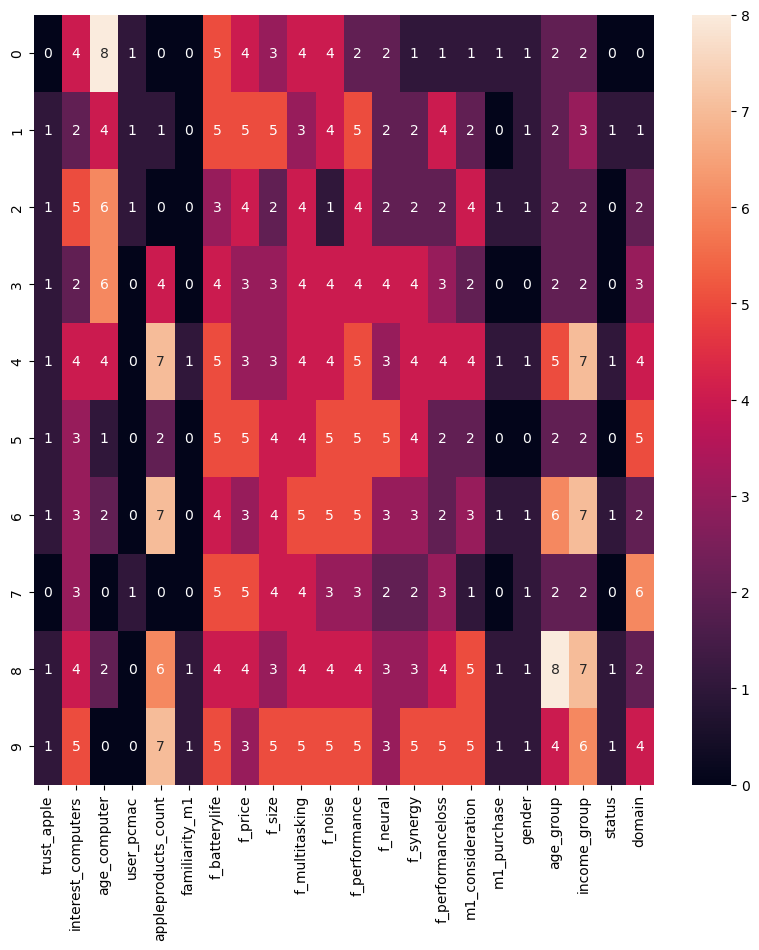

In [11]:
plt.figure(figsize = (10,10))
sns.heatmap(df.iloc[0:10],annot=True)

<Axes: >

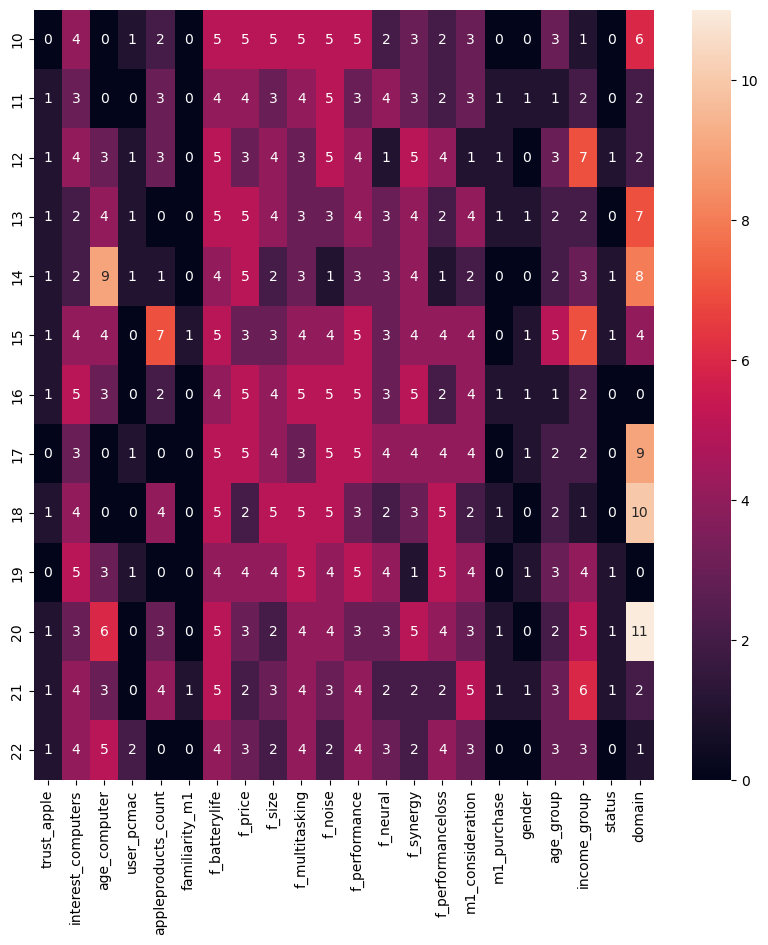

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(df.iloc[10:23],annot=True)

<Axes: >

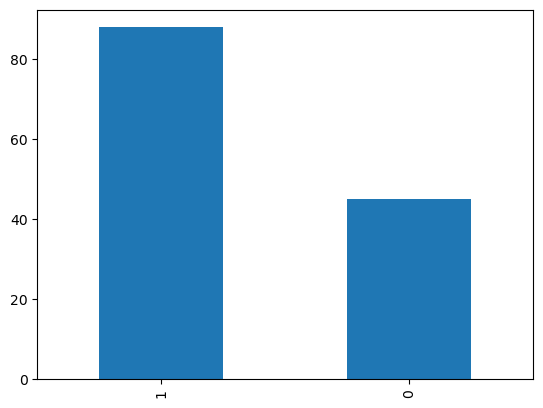

In [13]:
count_Class= pd.value_counts(df["m1_purchase"], sort= True)
count_Class.plot(kind= 'bar')

<Axes: >

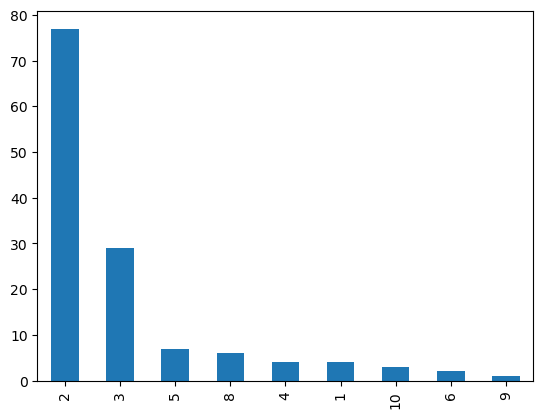

In [14]:
count_Class= pd.value_counts(df["age_group"], sort= True)
count_Class.plot(kind= 'bar')

<Axes: xlabel='age_group', ylabel='Density'>

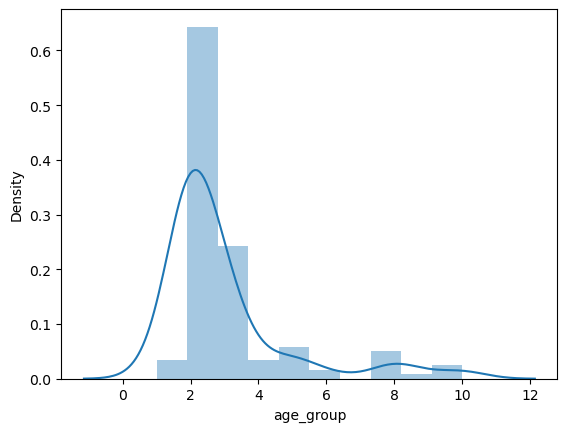

In [15]:
sns.distplot(df['age_group'] , bins = 10)

In [16]:
df.columns

Index(['trust_apple', 'interest_computers', 'age_computer', 'user_pcmac',
       'appleproducts_count', 'familiarity_m1', 'f_batterylife', 'f_price',
       'f_size', 'f_multitasking', 'f_noise', 'f_performance', 'f_neural',
       'f_synergy', 'f_performanceloss', 'm1_consideration', 'm1_purchase',
       'gender', 'age_group', 'income_group', 'status', 'domain'],
      dtype='object')

In [17]:
df['m1_purchase'].value_counts()

1    88
0    45
Name: m1_purchase, dtype: int64

In [18]:
#sns.pairplot(df.iloc[10:23])

In [19]:
#sns.pairplot(df.iloc[0:10])

In [20]:
dd = ['user_pcmac','appleproducts_count','age_computer','user_pcmac','appleproducts_count','familiarity_m1','status','domain']
df =df.drop(columns= dd,axis=1)

In [21]:
df

,trust_apple,interest_computers,f_batterylife,f_price,f_size,f_multitasking,f_noise,f_performance,f_neural,f_synergy,f_performanceloss,m1_consideration,m1_purchase,gender,age_group,income_group
0,0,4,5,4,3,4,4,2,2,1,1,1,1,1,2,2
1,1,2,5,5,5,3,4,5,2,2,4,2,0,1,2,3
2,1,5,3,4,2,4,1,4,2,2,2,4,1,1,2,2
3,1,2,4,3,3,4,4,4,4,4,3,2,0,0,2,2
4,1,4,5,3,3,4,4,5,3,4,4,4,1,1,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,5,5,3,3,5,4,5,5,3,3,5,1,1,3,3
129,1,5,4,3,2,4,4,4,2,3,1,5,1,1,3,5
130,1,4,5,4,3,5,5,5,4,4,5,5,1,0,2,3
131,1,5,5,3,4,4,4,5,2,3,3,5,1,0,2,2


In [22]:
#sns.pairplot(df)

In [23]:
x = df.drop(['m1_purchase'],axis = 1)
y = df['m1_purchase']

In [24]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

Xr, yr = smote.fit_resample(x , y)
yr.value_counts()

1    88
0    88
Name: m1_purchase, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xr,yr,test_size = 0.2 , random_state = 42)

In [26]:
X_train.shape,X_test.shape

((140, 15), (36, 15))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [28]:
#now we will assign variable to those algorithms
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()

In [29]:
#for accuracy we will import classification report and accuracy score
from sklearn.metrics import classification_report,accuracy_score

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Accuracy score :',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    train = model.score(X_train,y_train)
    test  = model.score(X_test,y_test)
    print('Training performance :',train)
    print('testing performance :',test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

Accuracy score : 0.8333333333333334
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.82      0.90      0.86        20

    accuracy                           0.83        36
   macro avg       0.84      0.82      0.83        36
weighted avg       0.84      0.83      0.83        36

Training performance : 0.7857142857142857
testing performance : 0.8333333333333334


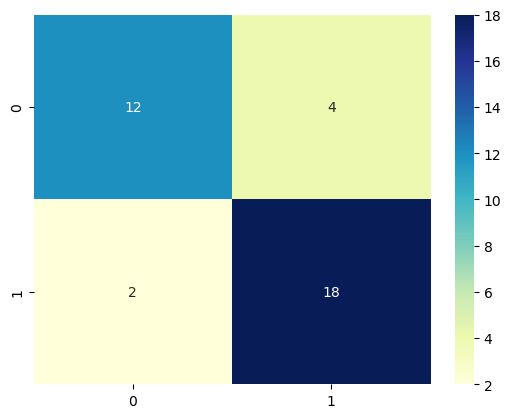

In [32]:
mymodel(logreg)

Accuracy score : 0.6944444444444444
              precision    recall  f1-score   support

           0       0.61      0.88      0.72        16
           1       0.85      0.55      0.67        20

    accuracy                           0.69        36
   macro avg       0.73      0.71      0.69        36
weighted avg       0.74      0.69      0.69        36

Training performance : 0.8
testing performance : 0.6944444444444444


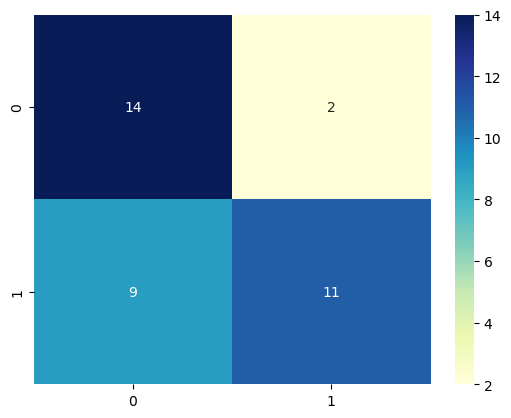

In [33]:
mymodel(knn)

Accuracy score : 0.8055555555555556
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.84      0.80      0.82        20

    accuracy                           0.81        36
   macro avg       0.80      0.81      0.80        36
weighted avg       0.81      0.81      0.81        36

Training performance : 0.9928571428571429
testing performance : 0.8055555555555556


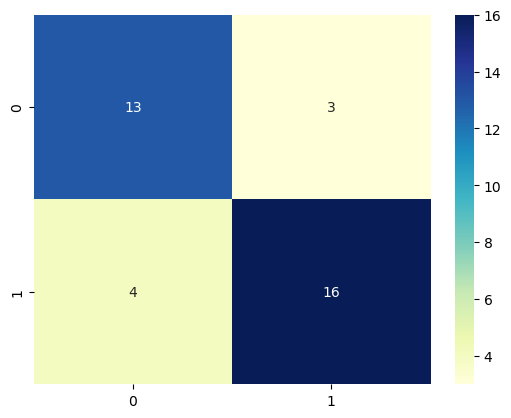

In [34]:
mymodel(dt)

Accuracy score : 0.7777777777777778
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.83      0.75      0.79        20

    accuracy                           0.78        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.78      0.78      0.78        36

Training performance : 0.8285714285714286
testing performance : 0.7777777777777778


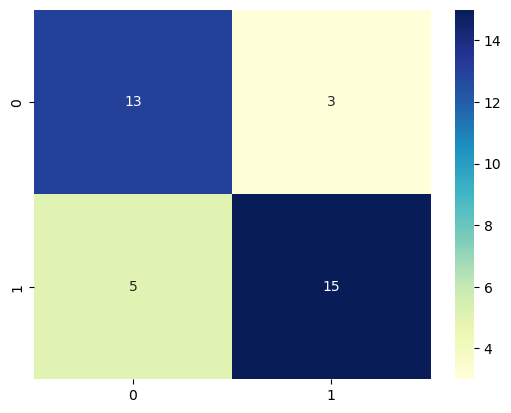

In [35]:
mymodel(svm)

In [36]:
svm = SVC(kernel='sigmoid',C= 1000.0)

Accuracy score : 0.6111111111111112
              precision    recall  f1-score   support

           0       0.56      0.62      0.59        16
           1       0.67      0.60      0.63        20

    accuracy                           0.61        36
   macro avg       0.61      0.61      0.61        36
weighted avg       0.62      0.61      0.61        36

Training performance : 0.5857142857142857
testing performance : 0.6111111111111112


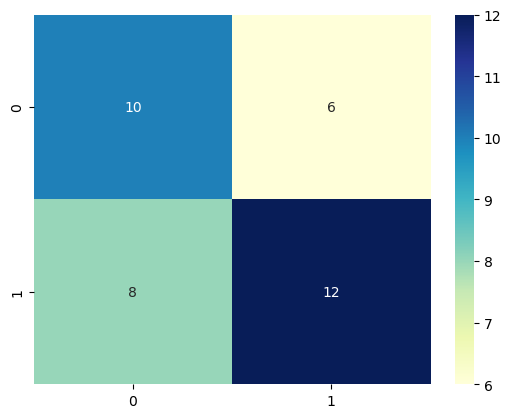

In [37]:
mymodel(svm)

In [38]:
svm = SVC(kernel='poly',C= 1.0)

Accuracy score : 0.8055555555555556
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.88      0.75      0.81        20

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.82      0.81      0.81        36

Training performance : 0.9142857142857143
testing performance : 0.8055555555555556


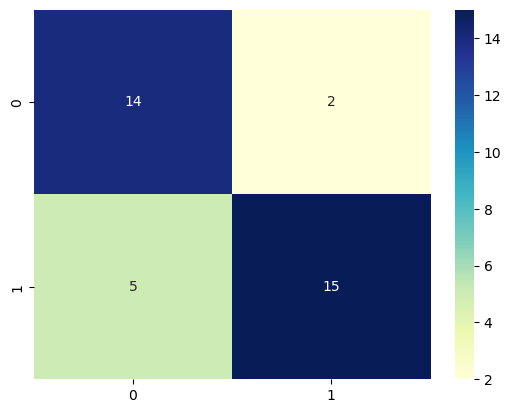

In [39]:
mymodel(svm)

In [40]:
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

train = logreg.score(X_train,y_train)
test  = logreg.score(X_test,y_test)
print('Training performance :',train)
print('testing performance :',test)

Accuracy score : 0.8333333333333334
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.82      0.90      0.86        20

    accuracy                           0.83        36
   macro avg       0.84      0.82      0.83        36
weighted avg       0.84      0.83      0.83        36

Training performance : 0.7857142857142857
testing performance : 0.8333333333333334


In [41]:
logreg = LogisticRegression(multi_class='multinomial')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

train = logreg.score(X_train,y_train)
test  = logreg.score(X_test,y_test)
print('Training performance :',train)
print('testing performance :',test)

Accuracy score : 0.8333333333333334
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.82      0.90      0.86        20

    accuracy                           0.83        36
   macro avg       0.84      0.82      0.83        36
weighted avg       0.84      0.83      0.83        36

Training performance : 0.7928571428571428
testing performance : 0.8333333333333334


In [42]:
logreg = LogisticRegression(multi_class='multinomial',solver='saga')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

train = logreg.score(X_train,y_train)
test  = logreg.score(X_test,y_test)
print('Training performance :',train)
print('testing performance :',test)

Accuracy score : 0.8055555555555556
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.81      0.85      0.83        20

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.80        36

Training performance : 0.8
testing performance : 0.8055555555555556
